# Task 2: Creating Sentiment Analyzer

In [63]:
# We only need the following librairies

import pandas as pd
#import Altair as alt
import string
import csv
import ndjson

In [64]:
df_small = pd.read_csv('./small_corpus.csv').sample(frac = 1, random_state = 0).reset_index(drop = True)

In [65]:
#df_small.head(5)
print (df_small.keys())
print (df_small.head(10))
df_small['ratings'].describe()

Index(['id', 'ratings', 'reviews'], dtype='object')
       id  ratings                                            reviews
0  167185      1.0  Bad Plastic.  Both triggers fell off due to de...
1  128033      4.0  This game was made for those who already know ...
2  345894      3.0  Another game for me that just doesn't meet my ...
3  174410      3.0  Not quite the quality of the original and it d...
4  160819      2.0  Perhaps i didn't give this game enough time, b...
5  367924      1.0  You must be out of your mind to sell it for th...
6  115113      1.0  I bought 2. I was hoping I could play the new ...
7  398678      1.0  ***Buyer Beware!!*** I bought an adapter with ...
8  406538      1.0  Shipping and everything was great- I preordere...
9  463516      1.0  Didn't work at all with my Xbox.  Failed to ou...


count    4500.000000
mean        3.000000
std         1.699862
min         1.000000
25%         1.000000
50%         3.000000
75%         5.000000
max         5.000000
Name: ratings, dtype: float64

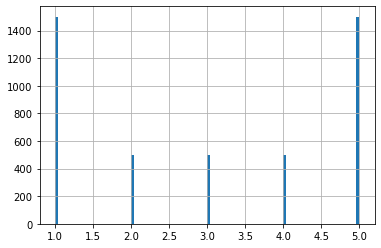

In [15]:
df_small.ratings.hist(bins = 100)

Cleaning Dataset

In [21]:
test_text = '''<p>There is a method for going in the other direction
@Article{,
    title = {Converting Odds Ratio to Relative Risk in Cohort Studies
      with Partial Data Information},
    author = {Zhu Wang},
    journal = {Journal of Statistical Software},
    year = {2013},
    volume = {55},
    number = {5},
    pages = {1--11},
    url = {<a href="http://www.jstatsoft.org/v55/i05/" rel="nofollow">http://www.jstatsoft.org/v55/i05/</a>},
  }
Not sure if this helps you as it would mean working in the relative risk scale. It has been implemented as an R package - search for orsk in the list of packages.</p>'''
print (test_text)

<p>There is a method for going in the other direction
@Article{,
    title = {Converting Odds Ratio to Relative Risk in Cohort Studies
      with Partial Data Information},
    author = {Zhu Wang},
    journal = {Journal of Statistical Software},
    year = {2013},
    volume = {55},
    number = {5},
    pages = {1--11},
    url = {<a href="http://www.jstatsoft.org/v55/i05/" rel="nofollow">http://www.jstatsoft.org/v55/i05/</a>},
  }
Not sure if this helps you as it would mean working in the relative risk scale. It has been implemented as an R package - search for orsk in the list of packages.</p>


In [103]:
# wieso gibts floats in reviews ???
import re
def data_cleaning (t):
    t = str(t)
    # rm line returns    
    t = re.sub("[\r\n]+",' ', t)
    # rm urls
    t = re.sub("http\S+",' ', t)
    # rm mentions
    t = re.sub("@\S+",' ', t)
    # rm some of the punctuation but keep ,.!? and -
    remove = '"#$%&()*+/:;<=>@[\\]^_`{|}~”“'
    pattern = r"[{}]".format(remove)
    #print (pattern)
    t = re.sub(pattern,' ', t)
    # rm ,.!?
    #pattern = ',.!?'
    #t = re.sub(pattern,' ', t)
    # # rm multiple spaces
    t = re.sub("\s\s+",' ', t) 
    # finally remove trailing spaces with strip()
    t = t.strip()   
    return t

def data_normalize (t):
    t = t.lower()    
    return t

In [40]:
cleaned_text = data_cleaning (test_text)
print (cleaned_text)
cleaned_text = data_normalize (cleaned_text)
print (cleaned_text)

p There is a method for going in the other direction title Converting Odds Ratio to Relative Risk in Cohort Studies with Partial Data Information author Zhu Wang journal Journal of Statistical Software year 2013 volume 55 number 5 pages 1--11 url a href rel nofollow Not sure if this helps you as it would mean working in the relative risk scale. It has been implemented as an R package - search for orsk in the list of packages. p
p there is a method for going in the other direction title converting odds ratio to relative risk in cohort studies with partial data information author zhu wang journal journal of statistical software year 2013 volume 55 number 5 pages 1--11 url a href rel nofollow not sure if this helps you as it would mean working in the relative risk scale. it has been implemented as an r package - search for orsk in the list of packages. p


In [104]:
print (df_small.reviews[0])
df_small['cleaned_reviews'] = df_small.reviews.apply(lambda t : data_cleaning(t) )
df_small['cleaned_reviews'] = df_small.cleaned_reviews.apply(lambda t : data_normalize(t) )
print (df_small.cleaned_reviews[0])

Bad Plastic.  Both triggers fell off due to deteriorated plastic in less a month.  Useless.
bad plastic. both triggers fell off due to deteriorated plastic in less a month. useless.


In [105]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mdb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [114]:
cleaned_text = data_cleaning (test_text)
print (cleaned_text)
sent = sent_tokenize(cleaned_text)
print (sent)
#words = word_tokenize (sent)
words = [w for s in sent for w in word_tokenize(s)]
print (words)


p There is a method for going in the other direction title Converting Odds Ratio to Relative Risk in Cohort Studies with Partial Data Information , author Zhu Wang , journal Journal of Statistical Software , year 2013 , volume 55 , number 5 , pages 1--11 , url a href rel nofollow Not sure if this helps you as it would mean working in the relative risk scale. It has been implemented as an R package - search for orsk in the list of packages. p
['p There is a method for going in the other direction title Converting Odds Ratio to Relative Risk in Cohort Studies with Partial Data Information , author Zhu Wang , journal Journal of Statistical Software , year 2013 , volume 55 , number 5 , pages 1--11 , url a href rel nofollow Not sure if this helps you as it would mean working in the relative risk scale.', 'It has been implemented as an R package - search for orsk in the list of packages.', 'p']
['p', 'There', 'is', 'a', 'method', 'for', 'going', 'in', 'the', 'other', 'direction', 'title', 'C

In [137]:
cleaned_text = data_cleaning (test_text)
words = [w for w in word_tokenize(cleaned_text)]
print (words)

['p', 'There', 'is', 'a', 'method', 'for', 'going', 'in', 'the', 'other', 'direction', 'title', 'Converting', 'Odds', 'Ratio', 'to', 'Relative', 'Risk', 'in', 'Cohort', 'Studies', 'with', 'Partial', 'Data', 'Information', ',', 'author', 'Zhu', 'Wang', ',', 'journal', 'Journal', 'of', 'Statistical', 'Software', ',', 'year', '2013', ',', 'volume', '55', ',', 'number', '5', ',', 'pages', '1', '--', '11', ',', 'url', 'a', 'href', 'rel', 'nofollow', 'Not', 'sure', 'if', 'this', 'helps', 'you', 'as', 'it', 'would', 'mean', 'working', 'in', 'the', 'relative', 'risk', 'scale', '.', 'It', 'has', 'been', 'implemented', 'as', 'an', 'R', 'package', '-', 'search', 'for', 'orsk', 'in', 'the', 'list', 'of', 'packages', '.', 'p']


In [108]:
df_small['sent'] = df_small.cleaned_reviews.apply (lambda t: sent_tokenize(t))

id                                                            167185
ratings                                                            1
reviews            Bad Plastic.  Both triggers fell off due to de...
cleaned_reviews    bad plastic. both triggers fell off due to det...
sent               [bad plastic., both triggers fell off due to d...
Name: 0, dtype: object
Index(['id', 'ratings', 'reviews', 'cleaned_reviews', 'sent'], dtype='object')


In [116]:
df_small['words'] = df_small.sent.apply (lambda t: [w for s in t for w in word_tokenize(s)])

id                                                            167185
ratings                                                            1
reviews            Bad Plastic.  Both triggers fell off due to de...
cleaned_reviews    bad plastic. both triggers fell off due to det...
sent               [bad plastic., both triggers fell off due to d...
words              [bad, plastic, ., both, triggers, fell, off, d...
Name: 0, dtype: object


In [117]:
print (df_small.iloc[0])

id                                                            167185
ratings                                                            1
reviews            Bad Plastic.  Both triggers fell off due to de...
cleaned_reviews    bad plastic. both triggers fell off due to det...
sent               [bad plastic., both triggers fell off due to d...
words              [bad, plastic, ., both, triggers, fell, off, d...
Name: 0, dtype: object


In [121]:
# was ist mit stop words ?
from nltk.corpus import opinion_lexicon
nltk.download('opinion_lexicon')

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\mdb\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\opinion_lexicon.zip.


True

In [126]:
#opinion_lexicon.words()[:4]
pos_list = set(opinion_lexicon.positive())
neg_list = set(opinion_lexicon.negative())
#print (pos_list)

{'exhilarating', 'gracious', 'prominent', 'soft', 'pamperedness', 'luxuriate', 'appreciated', 'hallmarks', 'surreal', 'groundbreaking', 'effectively', 'cooperative', 'awesomeness', 'simplified', 'enliven', 'righten', 'outsmart', 'likable', 'unabashed', 'sweetly', 'impartiality', 'evenly', 'rockstar', 'humorously', 'illustrious', 'excitedness', 'attraction', 'entrust', 'affirm', 'richly', 'plush', 'famed', 'laud', 'credence', 'understandable', 'freed', 'respectable', 'sweeping', 'nicer', 'flexible', 'deft', 'covenant', 'free', 'reliably', 'smoothes', 'sustainability', 'mercy', 'adorable', 'beauty', 'fervent', 'enlightenment', 'handily', 'cleanliness', 'solicitous', 'satisfying', 'right', 'profuse', 'exceeding', 'erudite', 'liking', 'bullish', 'felicity', 'awsome', 'courageousness', 'rejuvenated', 'glamorous', 'aspire', 'alluringly', 'patient', 'morality', 'pepped', 'wholeheartedly', 'excitedly', 'victorious', 'gladly', 'swift', 'soundly', 'ovation', 'auspicious', 'guidance', 'amazingly'

In [140]:
def sentiment(sentence):
    senti=0
    votes = 0
    # zur sicherheit kleinbuchstaben ...
    words = [word.lower() for word in word_tokenize(sentence)]
    for word in words:
        if word in pos_list:
            senti += 1
            votes += 1
        elif word in neg_list:
            senti -= 1
            votes += 1  
    if (votes):
        return senti/votes
    else:
        # hier kann nur null rauskommen
        return senti

In [141]:
df_small['sentiment']=df_small.cleaned_reviews.apply(sentiment)

In [145]:
print (df_small[['ratings', 'sentiment']])

      ratings  sentiment
0         1.0  -1.000000
1         4.0  -0.230769
2         3.0   1.000000
3         3.0   1.000000
4         2.0   0.777778
...       ...        ...
4495      1.0  -0.600000
4496      5.0   1.000000
4497      2.0  -0.333333
4498      4.0   1.000000
4499      4.0   0.333333

[4500 rows x 2 columns]


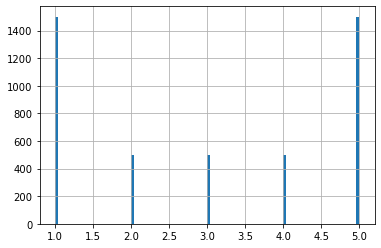

In [147]:
df_small.ratings.hist(bins = 100)

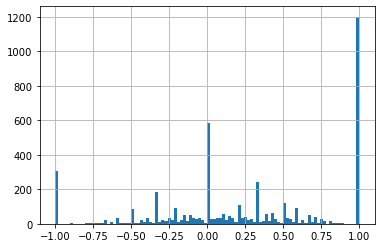

In [148]:
df_small.sentiment.hist(bins = 100)

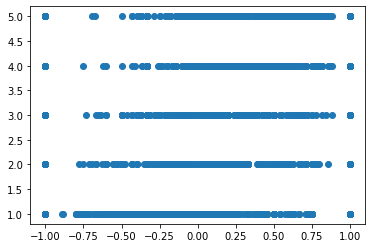

In [151]:
import matplotlib.pyplot as plt
plt.scatter (df_small['sentiment'], df_small['ratings'])